# SQLITE

### 1. Connettersi al database
Se il DataBase non esiste, ne verrà creato uno nuovo vuoto con il nome indicato

```python
import sqlite3 as sql
conn = sql.connect('nome_database.db')
cur = conn.cursor()
```




### 2. Creare schema
Importante scrivere alla fine **conn.commit()**
```python
cur.execute('''DROP TABLE IF EXISTS Students;''')

cur.execute('''CREATE TABLE Students(
                id INTEGER PRIMARY KEY,
                first_name TEXT NOT NULL,
                last_name TEXT NOT NULL,
                age INTEGER,
                email TEXT NOT NULL UNIQUE);
            ''')
conn.commit()
```

Si crea una seconda tabella la cui foreign key è collegata alla primary key "ID"
```python
cur.execute('''DROP TABLE IF EXISTS Student_courses;''')

cur.execute('''CREATE TABLE Student_courses(
                id INTEGER PRIMARY KEY,
                student_id INTEGER NOT NULL,
                course_id INTEGER,
                course_name TEXT NOT NULL,
                FOREIGN KEY(student_id) REFERENCES Student(id));
            ''')
conn.commit()

### 3. Popolare la table con i valori 
Si utilizza sempre il comando python  *cur.execute()* quando si lavora con una sola riga.
Tra  le ''' si scrive quello che  vogliamo svolgere sulla table tramite il linguaggio SQL 

```python
cur.execute('''INSERT INTO Students
                VALUES (1, 'John', 'Doe', 21, 'john@doe.com');''')

cur.execute('''DELETE FROM Students WHERE id=1;''')
```

Se vogliamo aggiungere allo stesso momento più righe nella tabella possiamo usare il comando *executemany()* e esplicitare come valori tanti ? quante le colonne della tabella. \
Per fare ciò è necessario creare una tupla di tuple *(the_students)* e usare il comando executemany oppure iterare con un for loop sulle tuple e usare *execute()*
```python
the_students = (
    (1, 'John', 'Doe', 21, 'john@doe.com'),
    (2, 'Alice', 'Doe', 22, 'alice@doe.com'),
    (3, 'Rose', 'Short', 21, 'rose@short.com')
    )
    
cur.executemany('''INSERT INTO Students VALUES(?, ?, ?, ?, ?)''', the_students)

for i in range(len(the_students)):
    cur.execute('''INSERT INTO Students VALUES(?, ?, ?, ?, ?)''', the_students[i])

conn.commit()
```

### 4. Vedere i valori della table
Bisogna SEMPRE selezionare i valori che vogliamo visualizzare, quindi la sintassi sarà sempre SELECT --> COMANDO-->SELECT--COMANDO, perché la selezione di azzera sempre dopo l'esecuzione di un comando.

```python
cur.execute('SELECT * FROM Students')
print( cur.fetchone() )

cur.execute('SELECT * FROM Students WHERE id=3')
print( cur.fetchall() )
```

### 5. Chiudere connessione
La variabile da chiudere è CONN non *cur*
```python
conn.close()

## Exceptions (eccezioni)
A better way to handle sqlite calls in python
Instead of putting else, there is FINALLY which is executed ALWAYS. Whataver happens, close the conncetion
```python
try:
    conn = sql.connect('sqlite_demo.db')
    cur = conn.cursor()
    print("Connection successful")
    # put here all your DB processing stuff - do not forget to commit after changes to the db
    cur.execute('SELECT * FROM Students')
    print(cur.fetchall())
    # closing a _cursor_ is a good idea to reclaim memory
    cur.close()
    
except sql.Error as error:
    print("Error in SQLite:", error)
    
finally:
    # whatever happens, close the connection
    conn.close()

# Importare SQLite DB --> Pandas DF

```python
import pandas as pd
import sqlite3 as sql

conn = sql.connect('nome_DB')
df = pd.read_sql_query('SELECT * FROM nometabella', conn)
```


# Esportare Pandas DF --> SQLite DB
Un problema di SQLite (o meglio di tutti i RDBMS in generale), è che non riconoscono l'oggetto pandas *datetime*
Quindi quando salviamo il pandas DF into SQLite facendo *to_sql()*, l'oggetto datetime verrà convertito in un oggetto *timestamp* automaticamente, che è il tipo di oggetto più vicino a datetime che SQlite conosca.
Perciò è importante quando carichiamo di nuovo il SQLite DB in PANDAS di ricordarci di convertire la colonna timerep in datetime e informare pandas che questa colnna timerep sarà l'indice del DF (se mi serve il tempo come indice)

```python
conn = sql.connect('nuovo_DB_personalizzato.sqlite') #Database vuoto

nome_dataframe_da_esportare.to_sql('nome_table', conn, if_exists='replace', 
                                   index=True, index_label ='timerep')

conn.close()
```

Quando andiamo a **rileggere il Database personalizzato**
```python
conn = sql.connect('nuovo_DB_personalizzato.sqlite') #Database NON vuoto

df2 = pd.read_sql('SELECT * FROM gubbio', conn, index_col='timerep', parse_dates=['timerep'])

conn.close()
```

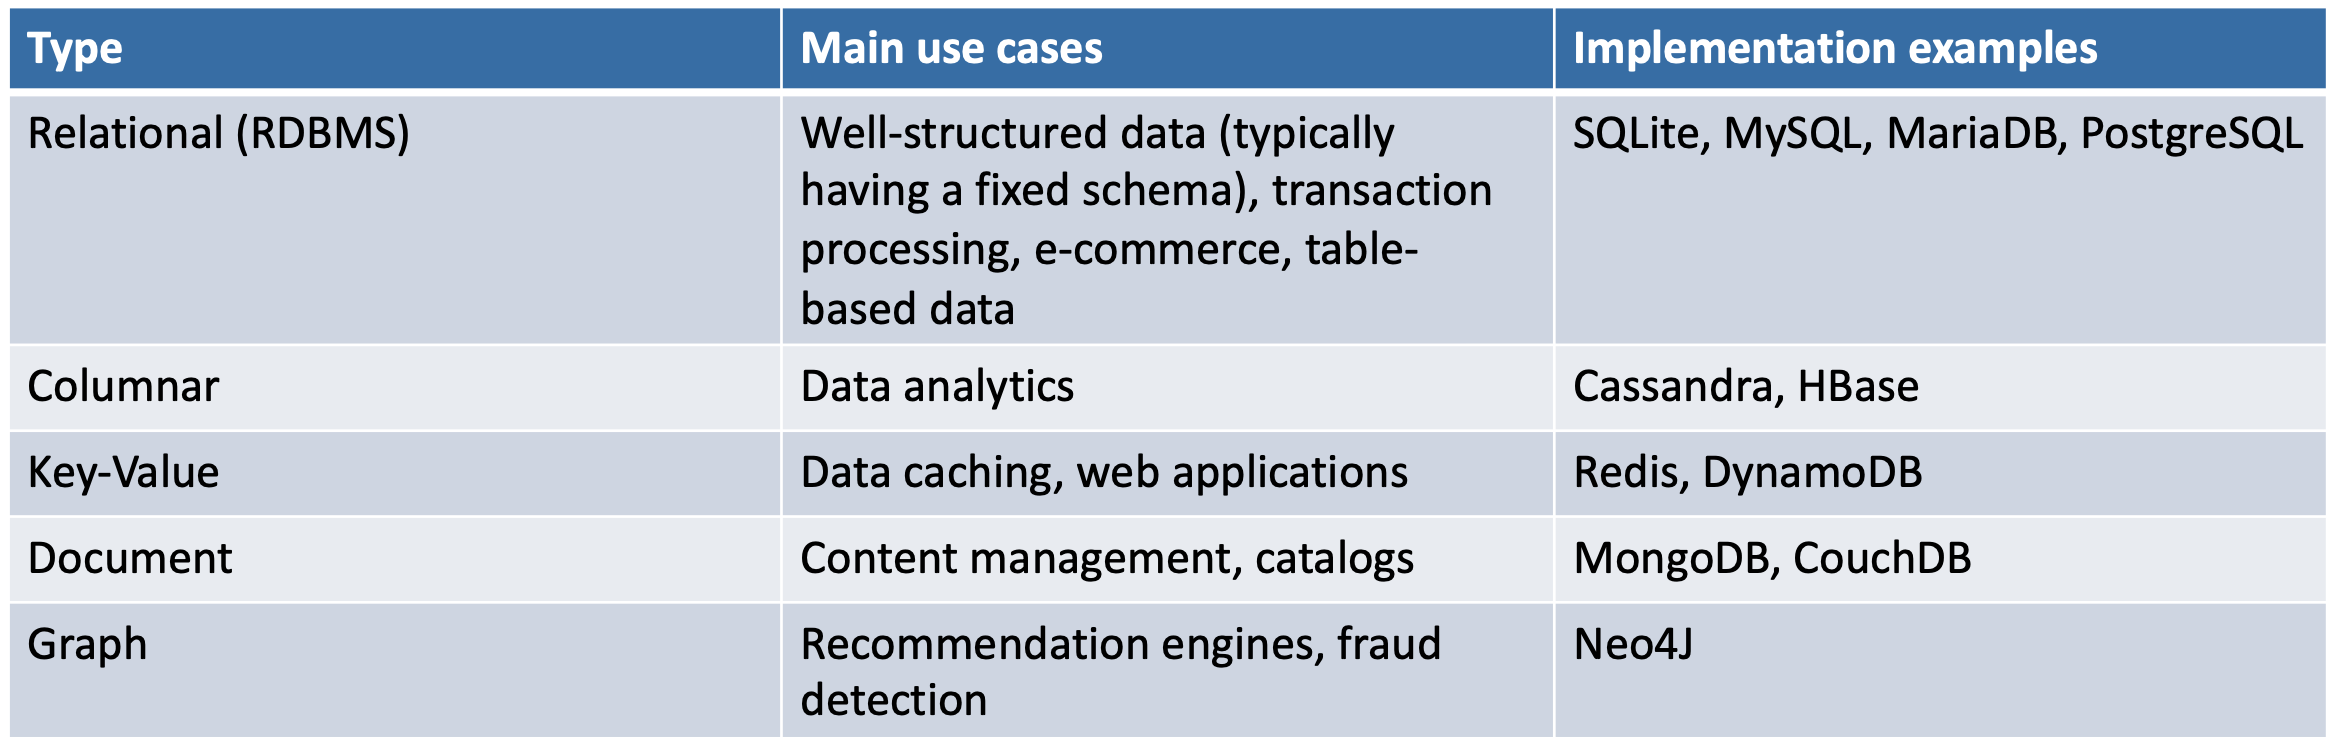